### Advanced Machine Learning - Final Project - Summer Term 2021

- Dev Kabra, 2396681, dev.kabra@student.kit.edu
- Jan Neidhöfer, 2401216, utves@student.kit.edu


## Task 1
Explain dataset and business problems in two paragraphs. (10 points)

##### Dataset
The dataset contains information on accepted and rejected people who applied for a loan at lending club. 

- The accepted dataset contains information about the borrower, e.g. financial situation, spatial information and fincancial history. The dataset also contains information about the loan itself, such as amount, interest rate, installment, loan purpose and more. The dataset ranks borrowers in grades and subgrades based on their information. In addition, the dataset contains the loan status, i.e. whether the borrower is currently on loan, defaulted, late with payments or has payed back his loan within the specified timeframe.

- The rejected dataset contains much less information. It lists the customers that have not been granted a loan after application. The dataset inherits basic information like the requested loan amount and the application date. In addition, it contains financial and spatial information about the customer. That is, there is information about the customer's debt to income ratio, his risk score and employment length as well as information about the customer's location (state & zip code). Information about the loan purpose can also be found in the dataset. We do not ned the set as we are interested in predicting defaults.

##### Business Problem

Leding Club is an online peer-to-peer lending platform that works as a marketplace to match borrowers to lenders. Borrowers are able to lend money at a lower interest rate compared to other credit issuing institutions. Lenders, on the other hand, receive higher expected returns in contrast to regular investment products. However, there is a risk of the borrower defaulting the loan. We try to predict whether a customer defaults or not by using various machine learning algorithms. With an accurate prediction, it would be possible to identify applicants who are likely to default. It is important, than false-classified defaults will be much more expensive than false-classified non-defaults. Defaulted customers mean that third party debt-collectors or other companies must be involved which is expensive. It also drives the risk for the lenders. If lending becomes riskier, fewer people will provide loans. This means a decrease in income for lending-club. Correct Classification hence is critical.

## Task 2
Do an explanatory analysis for this dataset. (10 points)

In [221]:
# Import relevant modules
import re
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
from sklearnex import patch_sklearn 
patch_sklearn()


# Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

# For logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm


# For classification tree
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Bagging
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

# Support Vector Machine
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem

# Neural Network
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# LASSO
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


filepath = '/Users/janneidhoefer/Code/ADML Kernel/archive/'

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Check for file location

folders = os.listdir(filepath)
folders = [f for f in folders if 'xlsx' not in f]
folders

['rejected_2007_to_2018q4.csv', 'accepted_2007_to_2018q4.csv']

In [3]:
# We do not need the 'rejected' data - so we will just import the data for accepted customers

acc_folder = filepath + [f for f in folders if 'accepted' in f][0]
accepted_fn = acc_folder + '/' + os.listdir(acc_folder)[0]

#Load data into DataFrame
acc_df = pd.read_csv(accepted_fn)


/Users/janneidhoefer/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Count of rows, columns of accepted data
acc_df.shape

(2260701, 151)

In [5]:
# Increase no. of max displayed rows to see all columns in transposed view
pd.options.display.max_rows = 200

In [6]:
acc_df.head().T

,0,1,2,3,4
id,68407277,68355089,68341763,66310712,68476807
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,3600,24700,20000,35000,10400
funded_amnt,3600,24700,20000,35000,10400
funded_amnt_inv,3600,24700,20000,35000,10400
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
installment,123.03,820.28,432.66,829.9,289.91
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1


In [7]:
# show information about datatype and no. of values for each column
acc_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          object 
 1   member_id                                   float64
 2   loan_amnt                                   float64
 3   funded_amnt                                 float64
 4   funded_amnt_inv                             float64
 5   term                                        object 
 6   int_rate                                    float64
 7   installment                                 float64
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                

In [8]:
# show basic descriptive statistics for each column
acc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.000000e+00,8000.0000,12800.000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092829,4.832138,5.310000e+00,9.4900,12.620,15.990000,3.099000e+01
installment,2260668.0,445.806823,267.173535,4.930000e+00,251.6500,377.990,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000,93000.000000,1.100000e+08
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840,24.490000,9.990000e+02
delinq_2yrs,2260639.0,0.306879,0.867230,0.000000e+00,0.0000,0.000,0.000000,5.800000e+01
fico_range_low,2260668.0,698.588205,33.010376,6.100000e+02,675.0000,690.000,715.000000,8.450000e+02


In [9]:
# Check DataFrame for missing values
acc_df.isnull().sum().sort_values(ascending=False)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_loan_status                          2249784
hardship_dpd                                  2249784
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
hardship_amount                               2249784
hardship_start_date                           2249784
hardship_end_date                             2249784
payment_plan_start_date                       2249784
hardship_length                               2249784
hardship_type                                 2249784
hardship_payoff_balance_amount                2249784
hardship_last_payment_amount                  2249784
settlement_percentage                         2226455
debt_settlement_flag_date                     2226455
settlement_status                             2226455
settlement_date             

In [10]:
# drop top 59 columns with lots of missing values
dropcols = acc_df.isnull().sum().sort_values(ascending=False).head(95).index
acc_df = acc_df.drop(columns=dropcols)
acc_df.shape

(2260701, 56)

In [11]:
# Check percentage of missing values for remaining columns

nulls = acc_df.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/acc_df.shape[0]*100)
nulls_percentage

last_pymnt_d                  0.108816
revol_util                    0.081170
dti                           0.077144
pub_rec_bankruptcies          0.061839
chargeoff_within_12_mths      0.007874
collections_12_mths_ex_med    0.007874
tax_liens                     0.006104
last_credit_pull_d            0.004645
inq_last_6mths                0.002787
earliest_cr_line              0.002743
total_acc                     0.002743
delinq_2yrs                   0.002743
open_acc                      0.002743
pub_rec                       0.002743
acc_now_delinq                0.002743
delinq_amnt                   0.002743
annual_inc                    0.001637
zip_code                      0.001504
pymnt_plan                    0.001460
addr_state                    0.001460
purpose                       0.001460
url                           0.001460
debt_settlement_flag          0.001460
loan_status                   0.001460
issue_d                       0.001460
verification_status      

In [12]:
# Drop missing data
acc_df = acc_df.dropna()
acc_df.shape

(2253339, 56)

In [13]:
# show distinct values in grade column
acc_df['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [14]:
# show distribution of grades
acc_df.grade.value_counts()

B    661941
C    648037
A    432199
D    322906
E    134798
F     41477
G     11981
Name: grade, dtype: int64

In [15]:
# show relative distribution of grades
acc_df.grade.value_counts(normalize=True)

B    0.293760
C    0.287590
A    0.191804
D    0.143301
E    0.059821
F    0.018407
G    0.005317
Name: grade, dtype: float64

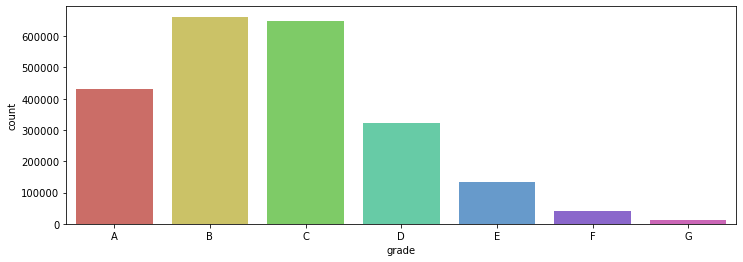

In [16]:
# Plot distribution of grades
acc_df['grade'] = acc_df['grade'].astype(str)
Order=sorted(acc_df.grade.unique())
plt.figure(figsize=(12,4))
sns.countplot(x='grade', data=acc_df, order=Order, palette='hls')
plt.show()

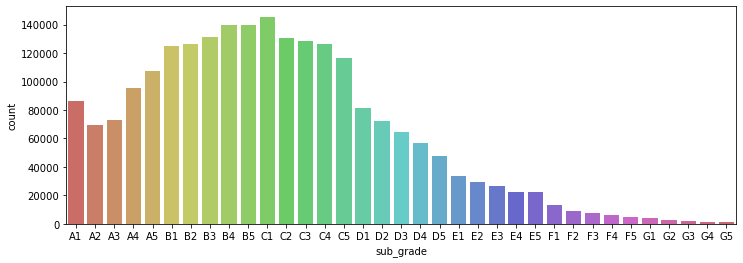

In [17]:
# Plot distribution of Subgrades
acc_df['sub_grade'] = acc_df['sub_grade'].astype(str)
Order=sorted(acc_df.sub_grade.unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=acc_df, order=Order, palette='hls')
plt.show()

In [18]:
# show distinct values in grade column
acc_df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [19]:
# show distribution of loan status
acc_df.loan_status.value_counts()

Fully Paid                                             1075146
Current                                                 876139
Charged Off                                             265880
Late (31-120 days)                                       21314
In Grace Period                                           8419
Late (16-30 days)                                         4341
Does not meet the credit policy. Status:Fully Paid        1526
Does not meet the credit policy. Status:Charged Off        534
Default                                                     40
Name: loan_status, dtype: int64

In [20]:
# show relative distribution of loan status
acc_df.loan_status.value_counts(normalize=True)

Fully Paid                                             0.477135
Current                                                0.388818
Charged Off                                            0.117994
Late (31-120 days)                                     0.009459
In Grace Period                                        0.003736
Late (16-30 days)                                      0.001926
Does not meet the credit policy. Status:Fully Paid     0.000677
Does not meet the credit policy. Status:Charged Off    0.000237
Default                                                0.000018
Name: loan_status, dtype: float64

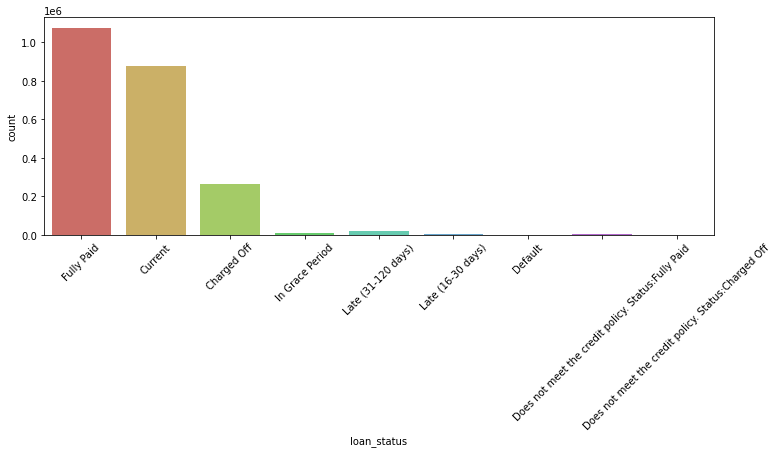

In [21]:
# Plot distribution of loan status
plt.figure(figsize=(12,4))
sns.countplot(x='loan_status', data=acc_df, palette='hls')
plt.xticks(rotation=45)
plt.show()

In [22]:
# In this project, we're only interested in cased that defaulted (charged off) or not
# Hence we will filter out rows that do not match these criteria
# Charged Off basically means a default, so we treat these entries as default

default_categories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
ndefault_categories = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

In [23]:
# Rename values as stated above
acc_df = acc_df.replace(dict.fromkeys(default_categories, 'Default'))
acc_df = acc_df.replace(dict.fromkeys(ndefault_categories, 'Fully Paid'))

In [24]:
# Filter Dataframe so that only Default and Fully Paid entries are present
acc_df = acc_df[acc_df.loan_status.isin(['Default', 'Fully Paid'])]
acc_df.loan_status.value_counts()

Fully Paid    1076672
Default        266454
Name: loan_status, dtype: int64

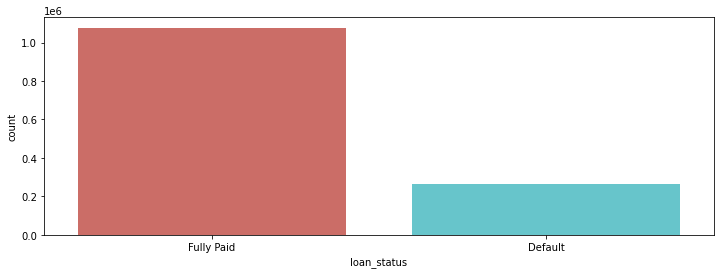

In [25]:
# Distribution of Default and Non-Default
plt.figure(figsize=(12,4))
sns.countplot(x='loan_status', data=acc_df, palette='hls')
plt.show()

In [26]:
# The Dataset looks imbalanced, let us find out how loan status is distributed (in percent)
# we might need to balance it before we use certain models 
acc_df['loan_status'].value_counts(normalize=True) * 100

Fully Paid    80.161653
Default       19.838347
Name: loan_status, dtype: float64

In [27]:
acc_df['loan_status'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Fully Paid
1          Fully Paid
2          Fully Paid
4          Fully Paid
5          Fully Paid
              ...    
2260688    Fully Paid
2260690    Fully Paid
2260691       Default
2260692    Fully Paid
2260697       Default
Name: loan_status, Length: 1343126, dtype: object>

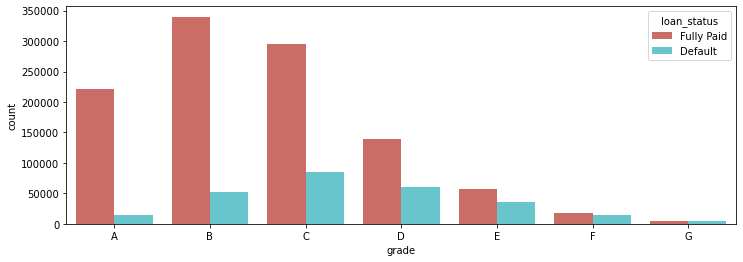

In [28]:
# plot distribution of loan status against grade
Order=sorted(acc_df.grade.unique())
plt.figure(figsize=(12,4))
sns.countplot(x=acc_df.grade,data=acc_df,order=Order,palette='hls',hue='loan_status')
plt.show()

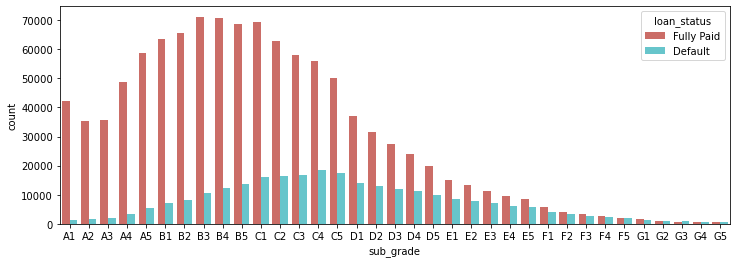

In [29]:
# plot distribution of loan status against sub_grade
Order=sorted(acc_df.sub_grade.unique())
plt.figure(figsize=(12,4))
sns.countplot(x=acc_df.sub_grade,data=acc_df,order=Order,palette='hls',hue='loan_status')
plt.show()

In [30]:
# Drop Grade column - it's part of sub_grade and we will use these
acc_df = acc_df.drop('grade', axis=1)

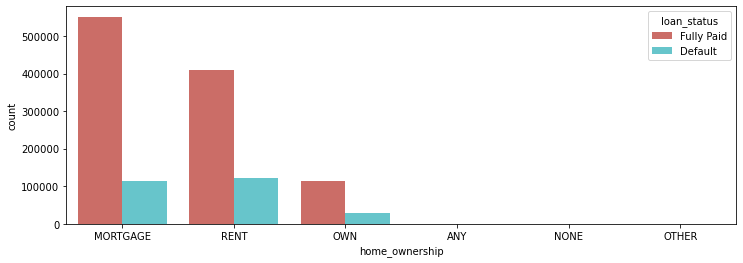

In [31]:
# plot distribution of loan status against sub_grade
plt.figure(figsize=(12,4))
sns.countplot(x=acc_df.home_ownership,data=acc_df,palette='hls',hue='loan_status')
plt.show()

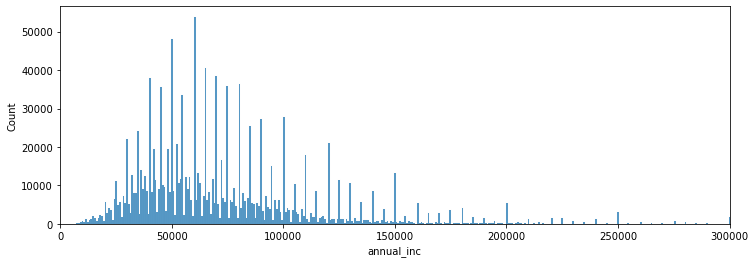

In [32]:
# Histogram of annual income
plt.figure(figsize=(12,4))
sns.histplot(acc_df.annual_inc, palette='hls', kde=False)
plt.xlim(0, 300000)
plt.show()

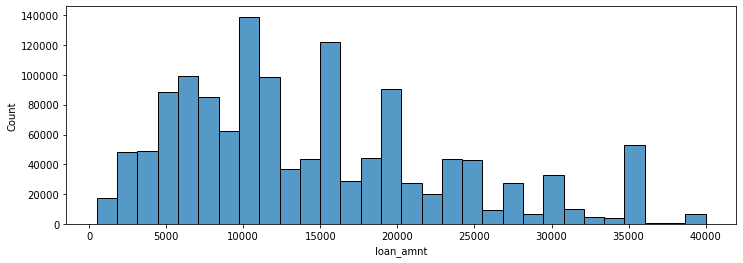

In [33]:
# Histogram of loan amounts
plt.figure(figsize=(12,4))
sns.histplot(acc_df.loan_amnt, palette='hls', kde=False, bins=30)
plt.show()

In [34]:
# Create new column by transforming Loan-Status to boolean column 'Default' where 1 = Default and 0 equals Non-Default
mapping = {'Default': 1, 'Fully Paid': 0}
acc_df['Loan_Paid'] = acc_df['loan_status'].map(mapping).astype(int)

In [35]:
# create dataframe with only numeric predictors
acc_df_num = acc_df.select_dtypes(exclude=['object']).copy()

correlation = acc_df_num.corr()
correlation[['Loan_Paid']].sort_values(['Loan_Paid'], ascending=False)

,Loan_Paid
Loan_Paid,1.000000
recoveries,0.506147
collection_recovery_fee,0.480193
int_rate,0.257529
total_rec_late_fee,0.142065
dti,0.085095
funded_amnt,0.065440
loan_amnt,0.065395
funded_amnt_inv,0.065214
inq_last_6mths,0.065159


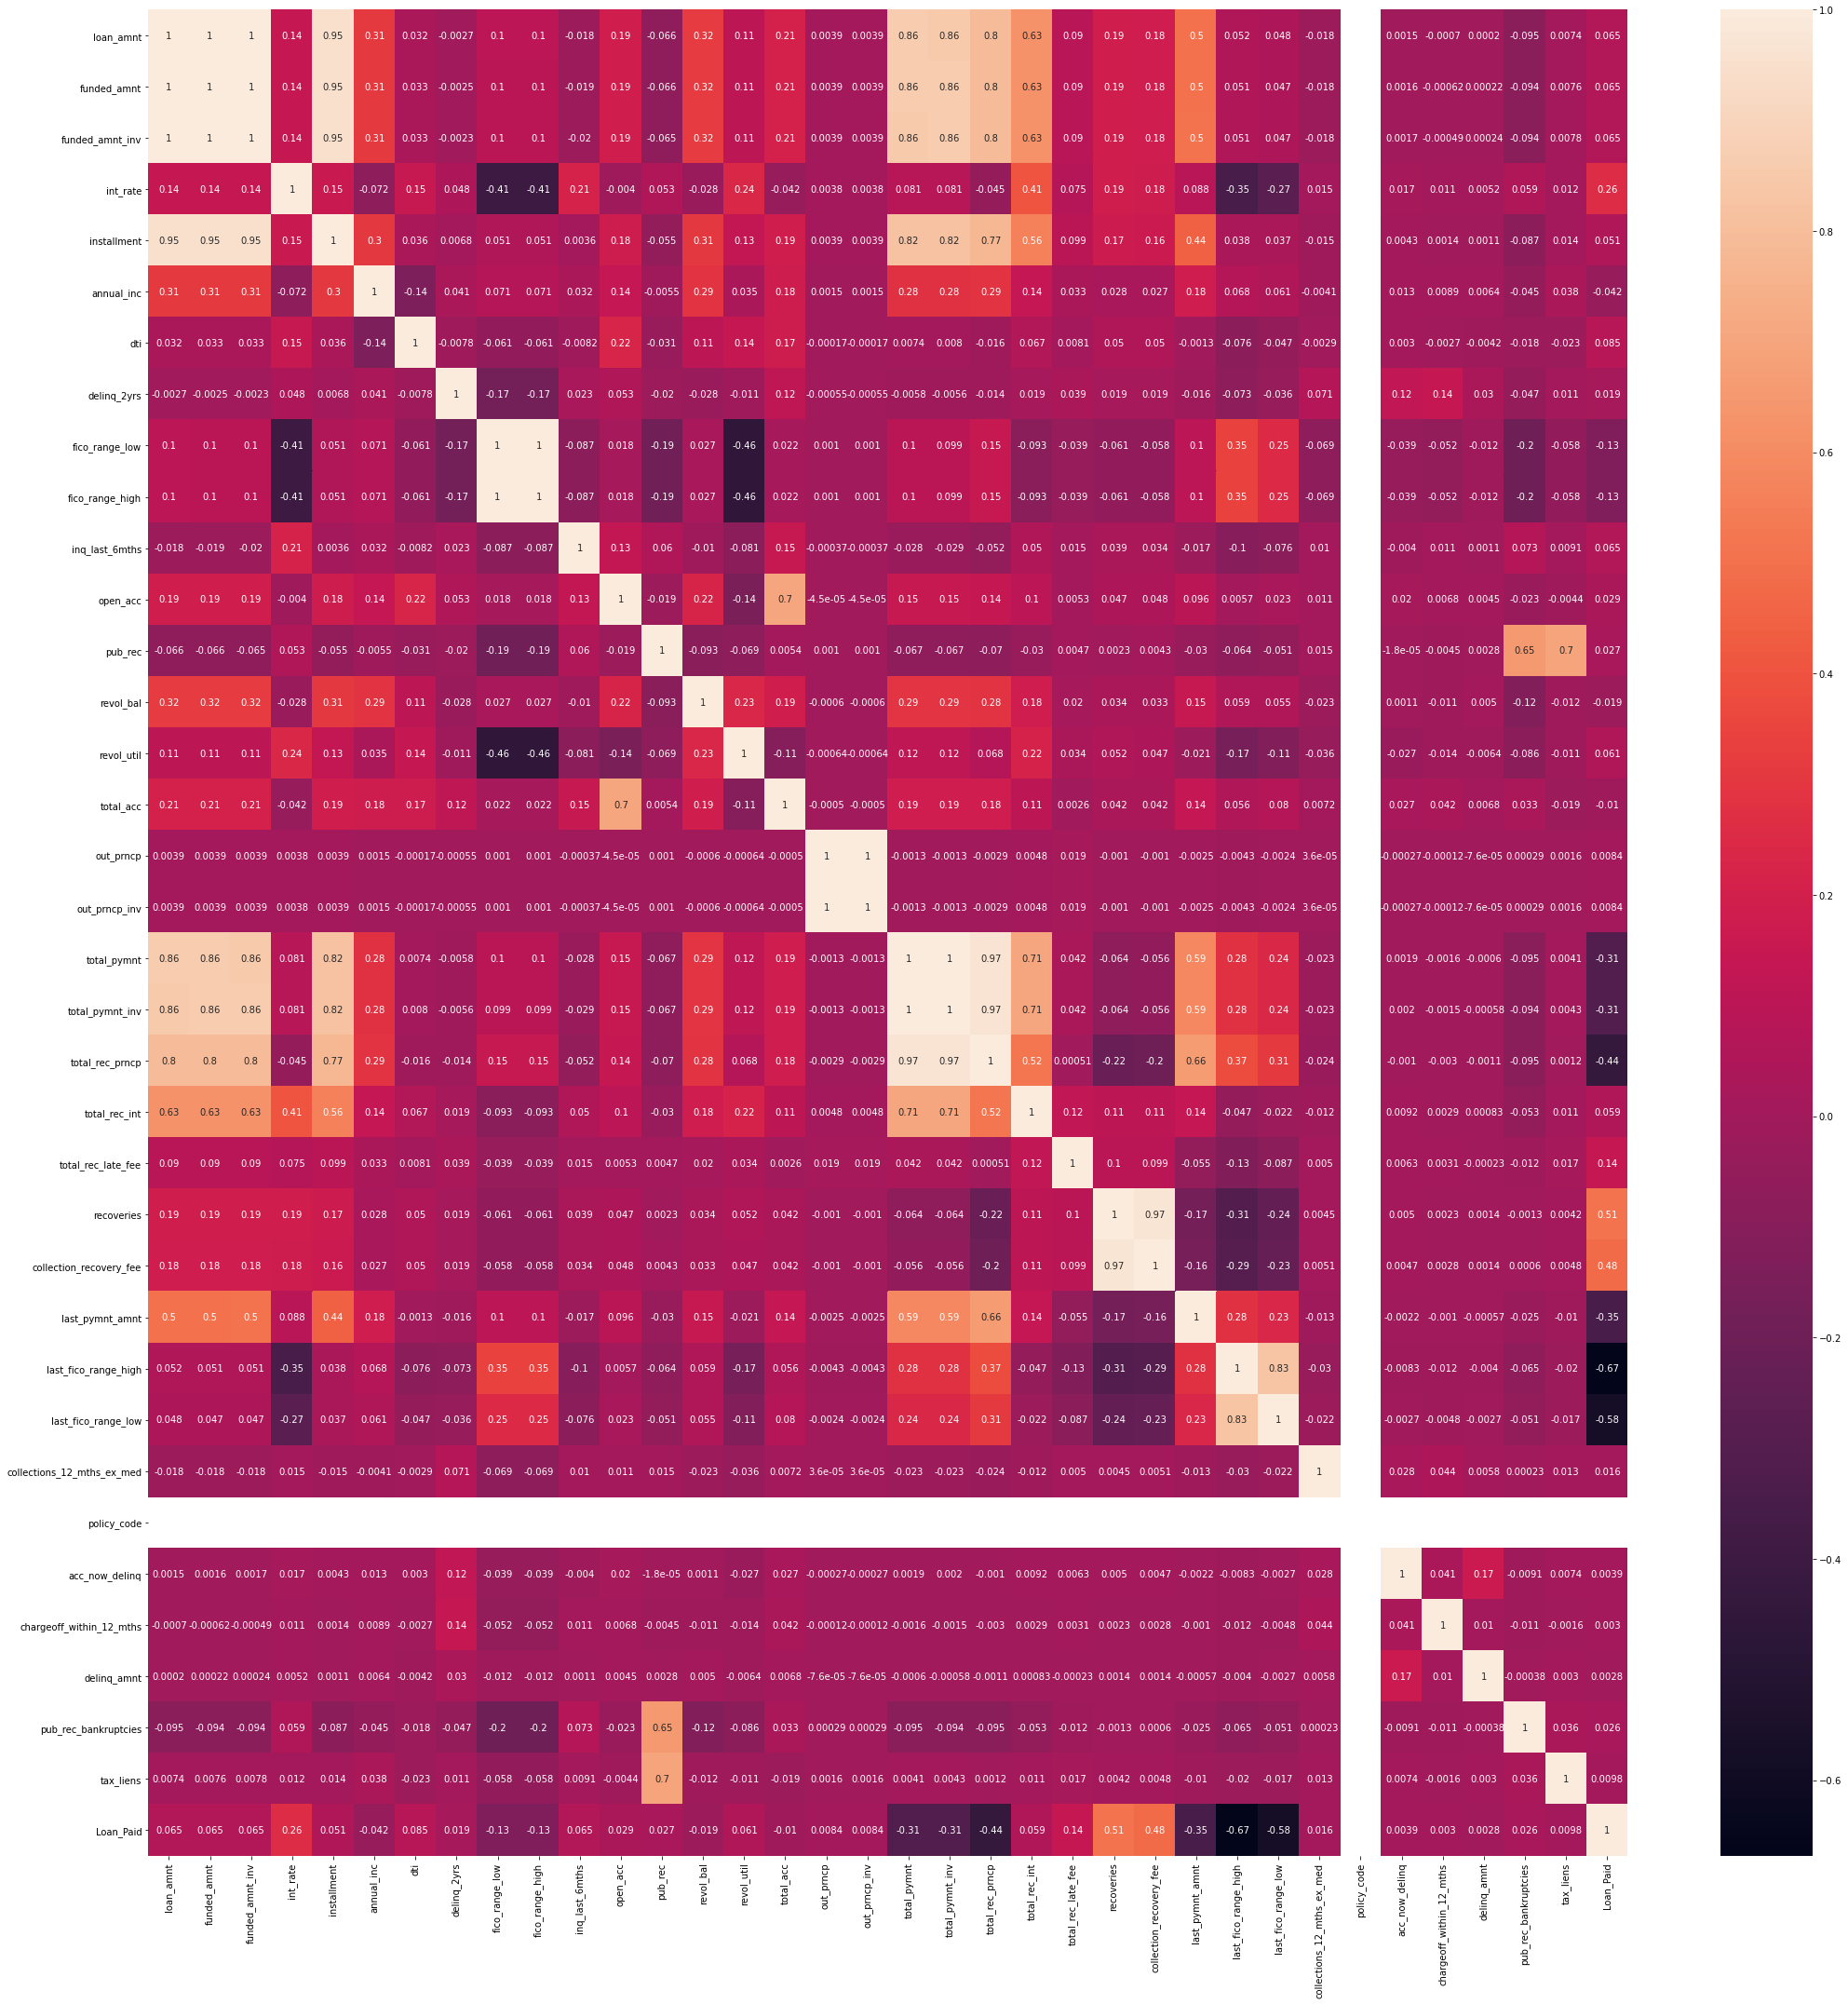

In [36]:
# Plot a correlation heatmap to identify highly correlated variables - multicollinearity
fig = plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)
fig.tight_layout()

In [37]:
# remove highly correlated columns and the one without output
dropcols = [
    'funded_amnt', 'funded_amnt_inv', 'installment', 
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
    'total_rec_int', 'policy_code'
    ]

acc_df = acc_df.drop(dropcols, axis=1)

<AxesSubplot:>

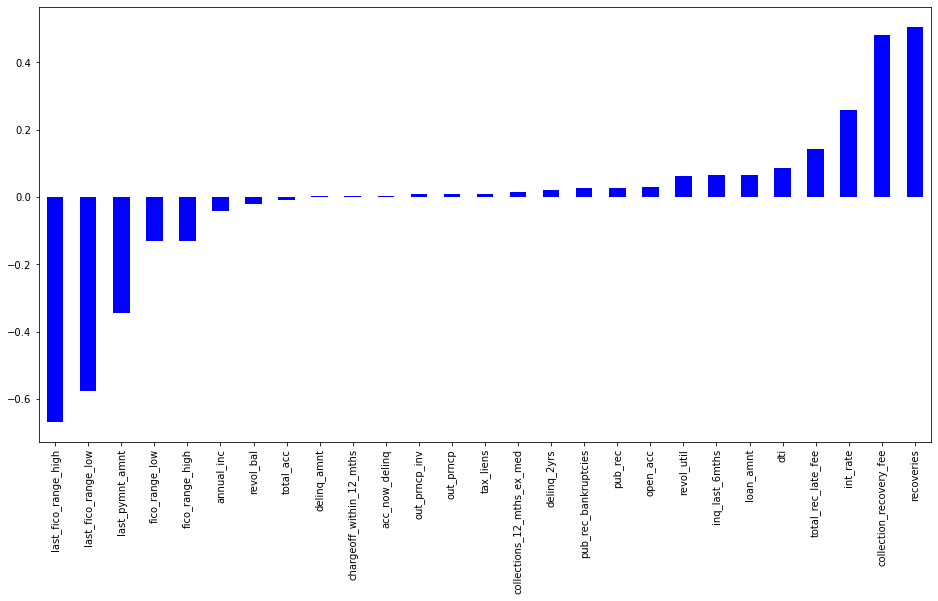

In [38]:
# The Graph shows which variables are negatively or positively correlated with someone defaulting
fig = plt.figure(figsize=(16,8))
acc_df.corr()['Loan_Paid'].sort_values(ascending=True).drop('Loan_Paid').plot.bar(color='blue')

In [39]:
# unstacking correlation to check highest correlation pairs 
c = acc_df.corr().abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']

In [40]:
# check feature pairs above 0.8 in correlation
cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr']>0.80)

corr_pairs[cond1 & cond2]

,feature1,feature2,corr
1,fico_range_high,fico_range_low,1.000000
2,collection_recovery_fee,recoveries,0.972340
3,last_fico_range_high,last_fico_range_low,0.829723


In [41]:
# drop columns that contain basically the same information as others

dropcols = ['fico_range_low', 'collection_recovery_fee', 'last_fico_range_low']
acc_df = acc_df.drop(dropcols, axis=1)

In [42]:
acc_df.head().T

,0,1,2,4,5
id,68407277,68355089,68341763,68476807,68426831
loan_amnt,3600,24700,20000,10400,11950
term,36 months,36 months,60 months,60 months,36 months
int_rate,13.99,11.99,10.78,22.45,13.44
sub_grade,C4,C1,B4,F1,C3
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,55000,65000,63000,104433,34000
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid


In [43]:
# Treating categorical columns
acc_df_cat = acc_df.select_dtypes(include=['object']).copy()
acc_df_cat.head().T

,0,1,2,4,5
id,68407277,68355089,68341763,68476807,68426831
term,36 months,36 months,60 months,60 months,36 months
sub_grade,C4,C1,B4,F1,C3
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
issue_d,Dec-2015,Dec-2015,Dec-2015,Dec-2015,Dec-2015
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
pymnt_plan,n,n,n,n,n
url,https://lendingclub.com/browse/loanDetail.acti...,https://lendingclub.com/browse/loanDetail.acti...,https://lendingclub.com/browse/loanDetail.acti...,https://lendingclub.com/browse/loanDetail.acti...,https://lendingclub.com/browse/loanDetail.acti...
purpose,debt_consolidation,small_business,home_improvement,major_purchase,debt_consolidation


In [44]:
# Make term an integer valued column
acc_df['term'] = acc_df['term'].apply(lambda term: int(term[:3]))

In [45]:
# Drop constant value columns and columns with too many different categorical values 
dropcols = [
    'id', 'pymnt_plan', 'hardship_flag', 
    'debt_settlement_flag', 'issue_d', 'url', 
    'last_pymnt_d', 'last_credit_pull_d', 'zip_code',
    'addr_state', 'earliest_cr_line', 'loan_status'
    ]
acc_df = acc_df.drop(columns=dropcols)
acc_df.head().T

,0,1,2,4,5
loan_amnt,3600,24700,20000,10400,11950
term,36,36,60,60,36
int_rate,13.99,11.99,10.78,22.45,13.44
sub_grade,C4,C1,B4,F1,C3
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,55000,65000,63000,104433,34000
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
purpose,debt_consolidation,small_business,home_improvement,major_purchase,debt_consolidation
dti,5.91,16.06,10.78,25.37,10.2
delinq_2yrs,0,1,0,1,0


In [46]:
# Transform ambiguous entry in home_ownership column
acc_df['home_ownership'] = acc_df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [47]:
# Create Dummy Variables with categorical variables, drop first transforms n possible values into n-1 variables
dummies = pd.get_dummies(acc_df[[
    'sub_grade', 'verification_status', 'initial_list_status', 
    'application_type','purpose', 'disbursement_method', 
    'home_ownership']], drop_first=True)

acc_df = acc_df.drop([
    'sub_grade', 'verification_status', 'initial_list_status', 
    'application_type','purpose', 'disbursement_method', 
    'home_ownership'],axis=1)

acc_df = pd.concat([acc_df,dummies],axis=1)
acc_df.head().T

,0,1,2,4,5
loan_amnt,3600.00,24700.00,20000.00,10400.00,11950.00
term,36.00,36.00,60.00,60.00,36.00
int_rate,13.99,11.99,10.78,22.45,13.44
annual_inc,55000.00,65000.00,63000.00,104433.00,34000.00
dti,5.91,16.06,10.78,25.37,10.20
delinq_2yrs,0.00,1.00,0.00,1.00,0.00
fico_range_high,679.00,719.00,699.00,699.00,694.00
inq_last_6mths,1.00,4.00,0.00,3.00,0.00
open_acc,7.00,22.00,6.00,12.00,5.00
pub_rec,0.00,0.00,0.00,0.00,0.00


In [48]:
acc_df.shape

(1343126, 81)


---
The data set is now prepared for our analysis with logistic regression and other machine learning techniques

---

### In Sample Logistic Regression

In [216]:
# Create vector of dependent variable y, and matrix of independet variable X 
y = acc_df['Loan_Paid']
X = acc_df.drop('Loan_Paid', axis=1)

In [217]:
# Split model, we use 70-30 approach
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(940188, 80)
(402938, 80)
(940188,)
(402938,)


In [218]:
# Create and fit logistic regression model
logr = LogisticRegression(random_state=0, penalty='none', solver='newton-cg', class_weight='balanced')
logr.fit(X_train, y_train)

/Users/janneidhoefer/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(class_weight='balanced', penalty='none', random_state=0,
                   solver='newton-cg')

In [219]:
print('Intercept: \n', logr.intercept_)
print('Coefficients: \n', logr.coef_)

Intercept: 
 [0.04601431]
Coefficients: 
 [[ 6.22756943e-05  5.18182949e-02  7.57900100e-02 -1.23965945e-06
   2.07350960e-02 -8.25234395e-03  1.74349356e-02 -2.09909662e-02
  -4.22246844e-03  1.46482805e-01 -7.07971435e-08 -5.14187248e-03
   1.30212559e-02  5.13032201e-03  5.13032201e-03  7.12735000e-03
   9.42259505e-01 -1.08703996e-03 -2.61288851e-02  2.95958656e-02
  -2.25080565e-03  1.52655544e-02  7.10761624e-07  1.85233683e-01
  -3.70427915e-02 -1.09716022e-02 -1.92352174e-02 -1.11429368e-02
  -1.40710704e-02  3.09886010e-02  1.68844994e-02 -6.58534995e-03
   3.17236555e-03  3.04882193e-02  2.02342915e-02  2.00692183e-02
   7.57634824e-03  3.01863213e-02  1.85216141e-02  4.08744353e-03
   2.77464682e-02  1.17629423e-02  3.22010497e-03 -1.23082462e-02
  -4.82014528e-03 -1.15168962e-02 -6.20529813e-03 -1.68019417e-02
  -5.76364890e-03 -1.17538856e-02 -9.68990058e-03 -1.04859035e-02
  -8.20087553e-03 -2.87147287e-03 -2.07463747e-03 -2.98917958e-03
  -1.82545144e-03  3.65416241e-04 

In [222]:
# Use statsmodels to obtain a nice regression output
logr_smodel=sm.Logit(y_train,X_train)
result=logr_smodel.fit()
print(result.summary2())

         Current function value: 0.078076
         Iterations: 35


/Users/janneidhoefer/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                              Results: Logit
Model:                             Logit                         Pseudo R-squared:              0.843      
Dependent Variable:                y                             AIC:                           146969.2970
Date:                              2021-07-30 17:12              BIC:                           147897.8499
No. Observations:                  940188                        Log-Likelihood:                -73406.    
Df Model:                          78                            LL-Null:                       -4.6803e+05
Df Residuals:                      940109                        LLR p-value:                   0.0000     
Converged:                         0.0000                        Scale:                         1.0000     
No. Iterations:                    35.0000                                                                 
---------------------------------------------------------------------------

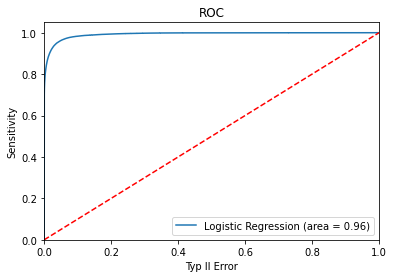

In [223]:
#plot ROC curve with given parameters
logit_roc_auc = roc_auc_score(y_test, logr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Typ II Error')
plt.ylabel('Sensitivity')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

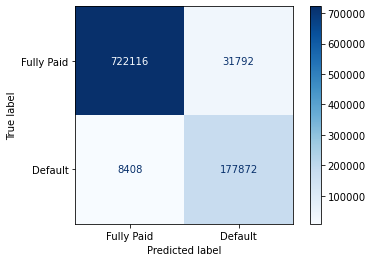

In [224]:
plot_confusion_matrix(logr,
                     X_train,
                     y_train,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues 
                     )

---
#### Results

The in-sample Logistic Regression has a pseudo R^2 of 84% meaning the model fit's the data considerable well but not perfect. The AUROC is at 96% which is very good and shows that the model is very good at predicting in general. The lower pseudo R^2 is likely due to the imbalanced data set. Hence, the model is very good at predicting the predominant class (non-default) but not as good in predicting defaults. The model shows a few insignificant features with high p-values.

The confusion matrix shows that ~32k of ~722k of the non-defaulted customers were missclassified. Also, ~8,4k of ~178k were misclassified in the default class. That means, in both cases around 4.5% are misclassified in the training set.  


## Task 4

Compare logistic regression, classification tree, random forest, bagging, support vector machine (with two kernel functions), and neural network for default prediction based on the out-of-sample performance measures (at least three different measures). (35 points)

### Out-of-Sample Logistic Regression

In [55]:
# We will use the fitted model from above to predict with the testing set
y_pred = logr.predict(X_test)

In [56]:
# Print the accuracy score
print(metrics.accuracy_score(y_test, y_pred))

0.9564027220068596


In [57]:
# Compare accuracy of training vs test score
print('Model test Score: %.3f, ' %logr.score(X_test, y_test),
      'Model training Score: %.3f' %logr.score(X_train, y_train))

Model test Score: 0.956,  Model training Score: 0.956


In [58]:
# print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    322780
           1       0.85      0.95      0.90     80158

    accuracy                           0.96    402938
   macro avg       0.92      0.96      0.93    402938
weighted avg       0.96      0.96      0.96    402938



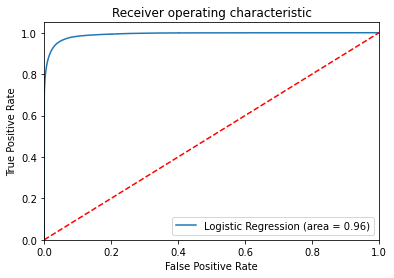

In [59]:
logit_roc_auc = roc_auc_score(y_test, logr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

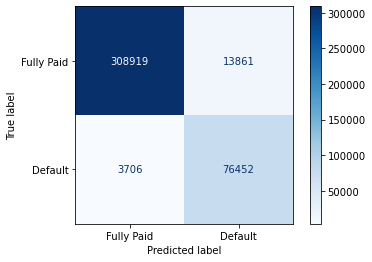

In [60]:
plot_confusion_matrix(logr,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues
                     )

### Classification Tree

In [61]:
cltree = tree.DecisionTreeClassifier(criterion="entropy")

In [62]:
# Use same split as in logistic regression
cltree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
y_pred = cltree.predict(X_test)

In [64]:
# Model Accuracy, how often is the classifier correct?
print(metrics.accuracy_score(y_test, y_pred))

0.9648035181591212


In [65]:
# It looks like we're overfitting
print('Model test Score: %.3f, ' %cltree.score(X_test, y_test),
      'Model training Score: %.3f' %cltree.score(X_train, y_train))

Model test Score: 0.965,  Model training Score: 1.000


In [66]:
# print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    322780
           1       0.91      0.91      0.91     80158

    accuracy                           0.96    402938
   macro avg       0.94      0.95      0.94    402938
weighted avg       0.96      0.96      0.96    402938



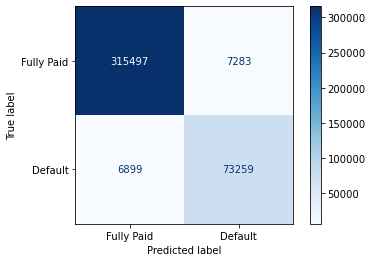

In [67]:
plot_confusion_matrix(cltree,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues
                     ) 

### Pruned Classification Tree

In [68]:
# We define the maximum depth of the tree. Note that this is pre-pruning and not post-pruning
pcltree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [69]:
# Train Decision Tree Classifer
pcltree = pcltree.fit(X_train,y_train)

In [70]:
#Predict the response for test dataset
y_pred = pcltree.predict(X_test)

In [71]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9531764192009688


In [72]:
print('Model test Score: %.3f, ' %pcltree.score(X_test, y_test),
      'Model training Score: %.3f' %pcltree.score(X_train, y_train))

Model test Score: 0.953,  Model training Score: 0.953


In [73]:
# print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    322780
           1       0.83      0.96      0.89     80158

    accuracy                           0.95    402938
   macro avg       0.91      0.95      0.93    402938
weighted avg       0.96      0.95      0.95    402938



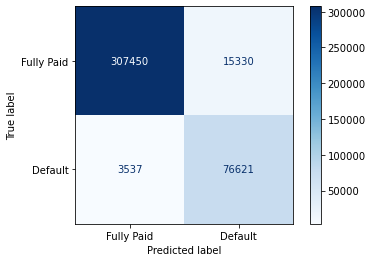

In [74]:
plot_confusion_matrix(pcltree,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues
                     ) 

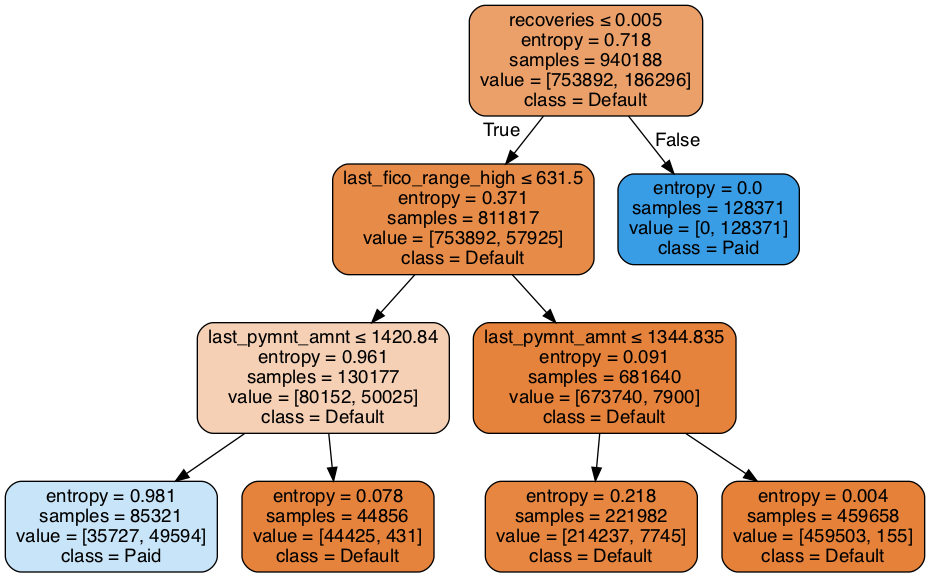

In [75]:
# Show tree (takes too long for large tree)
dot_data = StringIO()
export_graphviz(pcltree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['Default','Paid'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('pruned_tree.png')
Image(graph.create_png())

### Random Forest

In [76]:
# We model a random forest with 100 trees. Tests for 1000 trees were much longer and had similar results
rforest = RandomForestClassifier(n_estimators = 100)

In [77]:
rforest.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = rforest.predict(X_test)

In [79]:
print(metrics.accuracy_score(y_test, y_pred))

0.9764728072308891


In [80]:
print('Model test Score: %.3f, ' %rforest.score(X_test, y_test),
      'Model training Score: %.3f' %rforest.score(X_train, y_train))

Model test Score: 0.976,  Model training Score: 0.998


In [81]:
# print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    322780
           1       0.96      0.92      0.94     80158

    accuracy                           0.98    402938
   macro avg       0.97      0.95      0.96    402938
weighted avg       0.98      0.98      0.98    402938



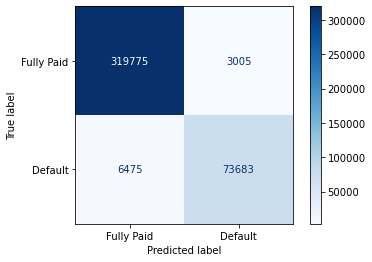

In [82]:
plot_confusion_matrix(rforest,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues
                     ) 

### Bagging

In [83]:
bagg = BaggingClassifier()

In [84]:
bagg.fit(X_train, y_train)

BaggingClassifier()

In [85]:
y_pred = bagg.predict(X_test)

In [86]:
print(metrics.accuracy_score(y_test, y_pred))

0.9744154187492865


In [87]:
print('Model test Score: %.3f, ' %bagg.score(X_test, y_test),
      'Model training Score: %.3f' %bagg.score(X_train, y_train))

Model test Score: 0.974,  Model training Score: 0.998


In [88]:
# print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    322780
           1       0.95      0.92      0.93     80158

    accuracy                           0.97    402938
   macro avg       0.97      0.95      0.96    402938
weighted avg       0.97      0.97      0.97    402938



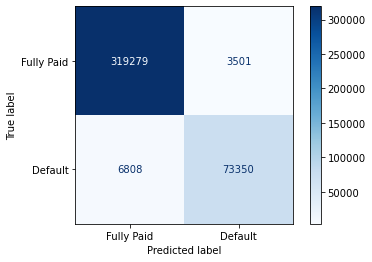

In [89]:
plot_confusion_matrix(bagg,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues
                     ) 

### Support Vector Machine (Linear Kernel)

In [90]:
# We need to scale our data to an 0,1 interval
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Max: ',X_train_scaled.max())
print('Min: ', X_train_scaled.min())

Max:  1.0
Min:  0.0


In [91]:
# Fit linear SVM Model
# We tell the model to weight the classes based on their prevalence in the data. This should account for imbalance

svm_lin = LinearSVC(class_weight='balanced')
svm_lin.fit(X_train_scaled, y_train)

LinearSVC(class_weight='balanced')

In [92]:
y_pred = svm_lin.predict(X_test)

In [93]:
print(metrics.accuracy_score(y_test, y_pred))

0.8347686244533898


In [94]:
print('Model test Score: %.3f, ' %svm_lin.score(X_test_scaled, y_test),
      'Model training Score: %.3f' %svm_lin.score(X_train_scaled, y_train))

Model test Score: 0.951,  Model training Score: 0.951


In [95]:
# print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    322780
           1       1.00      0.17      0.29     80158

    accuracy                           0.83    402938
   macro avg       0.91      0.58      0.60    402938
weighted avg       0.86      0.83      0.78    402938



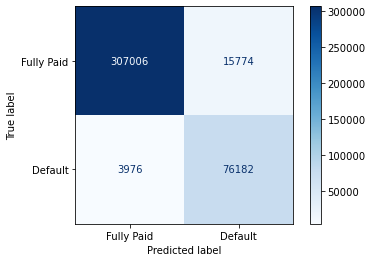

In [96]:
plot_confusion_matrix(svm_lin,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues
                     )                             

### Support Vector Machine (Approx. Polynomial Kernel)

In [209]:
# We use the Nystroem approximation for the Polynomial (degree 3) Kernel. 
# The data set is too huge and RBF does not scale.
# Since we do not have the computational power, we will approximate the kernel with Nystroem
# Afterwards we feed it to a linear kernel
# Multiple gamma values were tested (0.001, 0.1, 0.5, 1, 10) and 0.1 gave the best result
svm_pol = LinearSVC()

feature_map_nystroem = Nystroem(kernel='poly', gamma=0.1, degree=3, n_components=300, kernel_params={'class_weight':'balanced'})
data_transformed = feature_map_nystroem.fit_transform(X_train_scaled)
test_transformed = feature_map_nystroem.transform(X_test)

In [210]:
svm_pol.fit(data_transformed, y_train)

LinearSVC()

In [211]:
y_pred = svm_pol.predict(test_transformed)

In [212]:
print(metrics.accuracy_score(y_test, y_pred))

0.5388000138979198


In [213]:
print('Model test Score: %.3f, ' %svm_pol.score(test_transformed, y_test),
      'Model training Score: %.3f' %svm_pol.score(data_transformed, y_train))

Model test Score: 0.539,  Model training Score: 0.953


In [214]:
# print classification report with precision, recall, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.44      0.61    322780
           1       0.29      0.92      0.44     80158

    accuracy                           0.54    402938
   macro avg       0.63      0.68      0.52    402938
weighted avg       0.83      0.54      0.57    402938



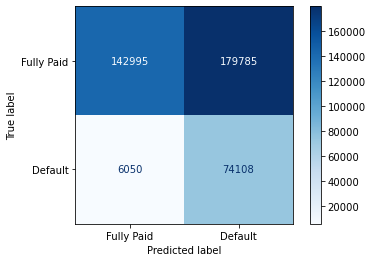

In [215]:
plot_confusion_matrix(svm_pol,
                     test_transformed,
                     y_test,
                     values_format='d',
                     display_labels=['Fully Paid', 'Default'],
                     cmap=plt.cm.Blues
                     )

### Neural Network

In [173]:
# We specify the model and its functions 

model = Sequential()

# input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy')

In [105]:
# Specify early stopping logic
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [106]:
model.fit(x=X_train_scaled, 
          y=y_train, 
          epochs=400,
          verbose = 2,
          batch_size=256,
          validation_data=(X_test_scaled, y_test),
          callbacks=[early_stop])

Epoch 1/400
3673/3673 - 10s - loss: 0.1447 - val_loss: 0.1002
Epoch 2/400
3673/3673 - 6s - loss: 0.1022 - val_loss: 0.0926
Epoch 3/400
3673/3673 - 9s - loss: 0.0960 - val_loss: 0.0885
Epoch 4/400
3673/3673 - 6s - loss: 0.0926 - val_loss: 0.0856
Epoch 5/400
3673/3673 - 9s - loss: 0.0890 - val_loss: 0.0833
Epoch 6/400
3673/3673 - 8s - loss: 0.0858 - val_loss: 0.0797
Epoch 7/400
3673/3673 - 6s - loss: 0.0836 - val_loss: 0.0780
Epoch 8/400
3673/3673 - 6s - loss: 0.0820 - val_loss: 0.0784
Epoch 9/400
3673/3673 - 6s - loss: 0.0812 - val_loss: 0.0771
Epoch 10/400
3673/3673 - 6s - loss: 0.0801 - val_loss: 0.0762
Epoch 11/400
3673/3673 - 6s - loss: 0.0792 - val_loss: 0.0746
Epoch 12/400
3673/3673 - 6s - loss: 0.0785 - val_loss: 0.0775
Epoch 13/400
3673/3673 - 6s - loss: 0.0782 - val_loss: 0.0742
Epoch 14/400
3673/3673 - 6s - loss: 0.0775 - val_loss: 0.0729
Epoch 15/400
3673/3673 - 6s - loss: 0.0773 - val_loss: 0.0729
Epoch 16/400
3673/3673 - 6s - loss: 0.0766 - val_loss: 0.0736
Epoch 17/400
367

Epoch 133/400
3673/3673 - 6s - loss: 0.0670 - val_loss: 0.0652
Epoch 134/400
3673/3673 - 6s - loss: 0.0669 - val_loss: 0.0656
Epoch 135/400
3673/3673 - 6s - loss: 0.0667 - val_loss: 0.0653
Epoch 136/400
3673/3673 - 6s - loss: 0.0667 - val_loss: 0.0656
Epoch 137/400
3673/3673 - 6s - loss: 0.0668 - val_loss: 0.0659
Epoch 138/400
3673/3673 - 6s - loss: 0.0666 - val_loss: 0.0657
Epoch 139/400
3673/3673 - 6s - loss: 0.0666 - val_loss: 0.0662
Epoch 140/400
3673/3673 - 6s - loss: 0.0668 - val_loss: 0.0656
Epoch 141/400
3673/3673 - 6s - loss: 0.0666 - val_loss: 0.0655
Epoch 142/400
3673/3673 - 6s - loss: 0.0665 - val_loss: 0.0655
Epoch 143/400
3673/3673 - 7s - loss: 0.0666 - val_loss: 0.0659
Epoch 144/400
3673/3673 - 6s - loss: 0.0666 - val_loss: 0.0645
Epoch 145/400
3673/3673 - 6s - loss: 0.0664 - val_loss: 0.0652
Epoch 146/400
3673/3673 - 6s - loss: 0.0663 - val_loss: 0.0659
Epoch 147/400
3673/3673 - 6s - loss: 0.0665 - val_loss: 0.0654
Epoch 148/400
3673/3673 - 6s - loss: 0.0662 - val_loss:

3673/3673 - 6s - loss: 0.0633 - val_loss: 0.0629
Epoch 264/400
3673/3673 - 6s - loss: 0.0632 - val_loss: 0.0637
Epoch 265/400
3673/3673 - 6s - loss: 0.0631 - val_loss: 0.0642
Epoch 266/400
3673/3673 - 6s - loss: 0.0633 - val_loss: 0.0626
Epoch 267/400
3673/3673 - 6s - loss: 0.0632 - val_loss: 0.0629
Epoch 268/400
3673/3673 - 6s - loss: 0.0630 - val_loss: 0.0625
Epoch 00268: early stopping


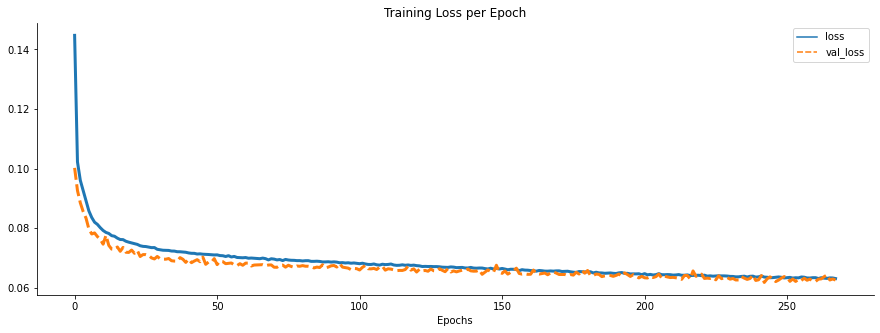

In [107]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [108]:
y_pred = model.predict(X_test)

In [109]:
predictions = model.predict_classes(X_test_scaled)

print('Classification Report:')
print(classification_report(y_test, predictions))
print('\n')
print('Confusion Matirx:')
print(confusion_matrix(y_test, predictions))

/Users/janneidhoefer/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    322780
           1       0.95      0.93      0.94     80158

    accuracy                           0.98    402938
   macro avg       0.97      0.96      0.96    402938
weighted avg       0.98      0.98      0.98    402938



Confusion Matirx:
[[319030   3750]
 [  5748  74410]]


---
#### Results

We compare the results of our different Algorithms based on Precision, Recall, F1-Score and Accuracy. 

##### Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    322780
           1       0.85      0.95      0.90     80158

    accuracy                           0.96    402938

Logistic Regression Shows a decent recall of 0.95 for fraud detection. However, Precision is not as good. Hence, some of the defaulted credits are being missclassified. Despite the Accuracy is at 0.96%, the model classifies non-defaults better than defaults. The f1 score is at 90%. Logistic Regression is quite fast (~90s).

##### Classification Tree

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    322780
           1       0.91      0.91      0.91     80158

    accuracy                           0.96    402938
    
The classification tree shows a recall and precision of 0.91 for fraud detection. This is quite good for a simple classification tree. As with Logistic Regression, non-defaults are detected better than defaults. The f1 score is at 0.91 and slightly higher as Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    322780
           1       0.83      0.96      0.89     80158

    accuracy                           0.95    402938
    
The pruned tree has a better recall value but worse precision. F1 score is slightly worse compared to LR and the regular tree. However, the pruned tree is easily interpretable (see picture)

##### Random Forest

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    322780
           1       0.96      0.92      0.94     80158

    accuracy                           0.98    402938

The random forest performs really well. With a precision of 0.96 a recall of 0.94 and a f1-score of 0.94 it performs better than the algorithms before. However, the computation takes longer for 100 trees. 

##### Bagging

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    322780
           1       0.95      0.92      0.93     80158

    accuracy                           0.97    402938
    
Bagging performs well for fraud detection. Its performance measures are comparable to random forest. A precision of 0.95 and a recall of 0.92 mean good performance in fraud detection. The f1 score is slightly worse than random forest.

##### Support Vector Machine

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    322780
           1       1.00      0.17      0.29     80158

    accuracy                           0.83    402938

The linear kernel SVM has a precision score of 1 for fraud detection. That means, it works really good with predicting defaults. However, Recall is very low with 0.17. This leads to a worse f1-score. The model is not as good with prediction non-defaults.

              precision    recall  f1-score   support

           0       0.96      0.44      0.61    322780
           1       0.29      0.92      0.44     80158

    accuracy                           0.54    402938

The approximated kernel SVM has the worst precision of our models with only 0.29. The Recall is competitive at 0.92. Consequently, the f1-score is quite low. It's important to note that we use an apprixmated Kernel using the Nynström approximation. SVM does not scale with high-dimensional data. Long computation time

##### Neural Network

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    322780
           1       0.95      0.93      0.94     80158

    accuracy                           0.98    402938

The neural network performs well for default prediction. The precision of 0.95 is comparable to the tree-based algorithms. Recall is also good at 0.93 percent and thus the f1-score is also high.

## Task 5

Use LASSO for variable selection and explain results. (15 points)

In [156]:
# We use the same scaled set from above
# We use LASSO with l1 Penalty to select from the variables of our set
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='saga'))
sel_.fit(X_train_scaled, y_train)

/Users/janneidhoefer/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1', solver='saga'))

In [157]:
# Show which variables are kept = 'true' and which are dropped 'false'
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [158]:
# Which variables are removed due to their lack of contribution?
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['pub_rec', 'tax_liens'], dtype='object')

---
#### Results

- LASSO is used here for variable selection. The l1 penalty is used to shrink estimates or zero them out. We can check which features get removed. This gives us insights how much our chosen variables contribute to our model. This means that they are irrelevant

- LASSO shrinks the estimates of pub_rec and tax_liens to zero. This means that they have small coefficients and do not contribute much to the default prediction. We could run LASSO before implementing our models to shrink our variable selection further. 

## Task 6

Which model do you suggest to the peer-to-peer company? Why? (10 points)

We suggest the peer-to-peer company to use the Random Forest Algorithm or Bagging. These provide a high percentage of classifying defaults as well as non-defaults. As defaults are much more expensive than non-defaults, the performance to predict defaults should be more important. However, since the company generates income with matching people, predicting non-defaults is also important. Hence, these algorithms work well for the company as they predict both classes with a high precision. They are also computed in a reasonable time which is an advantage for the company. 

Despite having the best precision of predicting defaults, Linear-SVM is not recommended as it does not scale well with huge amounts of data. It also performs significantly worse than the tree-based algorithms in terms of non-default prediction. Hence, people could get their loan rejected which results in missing income for the company.

Neural Network performs well in terms of default and non-default prediction and is comparable to the tree-based algorithms. However, the Neural Network takes a long time to compute and is thus not really scalable.

Logistic Regression has a too bad precision in prediction defaults. Otherwise it would be useful in predicting default predictions, as the company could then determine how much risk they want to take. 